In [2]:
__author__ = "me"
__date__ = "2015_10_13"

%pylab inline
import pandas as pd
import numpy as np
import geopandas as gp

import pylab as plt
import os

import requests
s = requests.get("https://raw.githubusercontent.com/Casyfill/CUSP_templates/master/Py/fbMatplotlibrc.json").json()
plt.rcParams.update(s)

PARQA = os.getenv('PARQA')

Populating the interactive namespace from numpy and matplotlib


/Users/casy/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:855: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
insps = pd.read_csv(PARQA + "data/All_Inspections.csv",index_col=0)
litter = insps[insps.Litter==1]
nolitter = insps[insps.Litter==0]

litter.Date = pd.to_datetime(litter.Date, format='%Y-%m-%d')
nolitter.Date = pd.to_datetime(nolitter.Date, format='%Y-%m-%d')

/Users/casy/anaconda/lib/python2.7/site-packages/pandas/core/generic.py:2273: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [4]:
litter.head(2)

,Prop ID,PropNum,Boro,GISBoro,District,Prop Name,Site Name,Prop Location,Site Location,ACRES,...,Paved Surfaces,Play Equipment,Safety Surface,Sidewalks,Trails,Trees,Water Bodies,Weeds,Adjusted Acres,ZIPCODE
3,B001,B001,B,B,01,AMERICAN PLAYGROUND,American Playground,"NOBLE, FRANKLIN, MILTON STS","NOBLE, FRANKLIN MILTON STS",0.896,...,0,0,0,0,NaN,0,NaN,0,1.098397,11222
8,B001,B001,B,B,01,AMERICAN PLAYGROUND,American Playground,"NOBLE, FRANKLIN, MILTON STS","NOBLE, FRANKLIN MILTON STS",0.896,...,0,0,0,0,NaN,0,NaN,0,1.098397,11222


In [5]:
def getBefore(x):
    '''find the timedelta between 
       the inspection and last call before it'''
    ID = x['Prop ID']
    if ID in pids.keys():
        calls = pids[ID]
        if len(calls[calls<x.Date])>0:
            delta = (x.Date - calls[calls<x.Date].iloc[-1]).days
            return delta
    
def getAfter(x): 
    '''find the timedelta between 
       the inspection and first call after it'''
    ID = x['Prop ID']
    if ID in pids.keys():
        calls = pids[ID]
        if len(calls[calls>x.Date])>0:
            delta = (calls[calls>x.Date].iloc[0] - x.Date).days
            return delta
    

## CALLS

In [6]:
calls = pd.read_csv(PARQA + 'data/311/311_rPID_litter.csv')

In [7]:
calls['Created Date'] = pd.to_datetime(calls['Created Date'])

In [8]:
pids = {}

c = calls.groupby('rParkID')
for name, df in c:
    x = df['Created Date'].sort_values()
    pids[name] = x

In [9]:
pids.values()[0]

279    2010-08-13 13:03:40
3664   2012-05-10 14:56:17
4007   2013-10-14 02:00:31
8049   2015-03-16 16:50:48
8050   2015-03-16 16:50:48
Name: Created Date, dtype: datetime64[ns]

In [10]:
litter['timeAfter'] = litter.apply(getAfter, axis=1)
litter['timeBefore'] = litter.apply(getBefore, axis=1)

/Users/casy/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/casy/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [11]:
nolitter['timeAfter'] =  nolitter.apply(getAfter, axis=1)
nolitter['timeBefore'] = nolitter.apply(getBefore, axis=1)

/Users/casy/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/casy/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


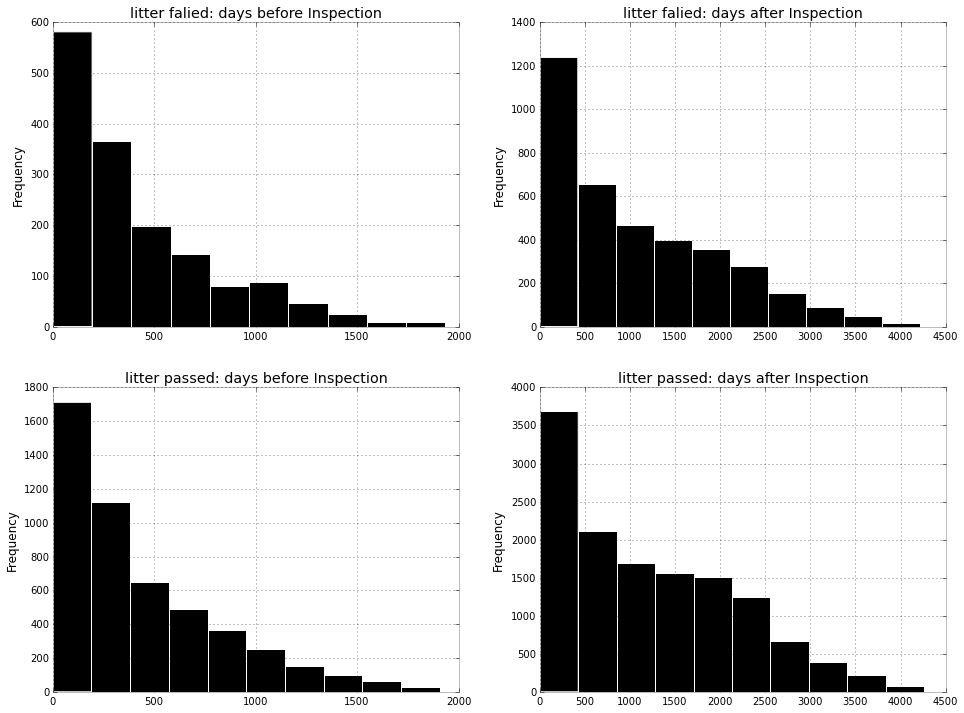

In [12]:
fig, axes = plt.subplots(2,2, figsize=(16,12))

litter.timeBefore.plot(kind='hist', ax=axes[0][0], color='k')
litter.timeAfter.plot(kind='hist',  ax=axes[0][1], color='k')

nolitter.timeBefore.plot(kind='hist', ax=axes[1][0], color='k')
nolitter.timeAfter.plot(kind='hist', ax=axes[1][1], color='k')


axes[0][0].set_title('litter falied: days before Inspection')
axes[0][1].set_title('litter falied: days after Inspection')


axes[1][0].set_title('litter passed: days before Inspection')
axes[1][1].set_title('litter passed: days after Inspection')

plt.savefig(PARQA + "parqa/Inspections/img/days_before_after.png")

In [13]:
# litter[litter.timeAfter>4000]

/Users/casy/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


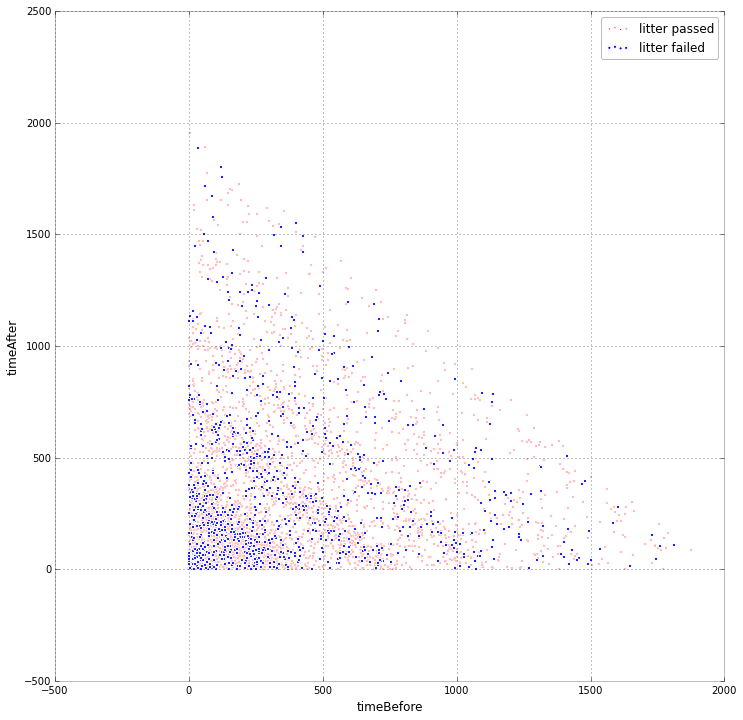

In [14]:
fig, ax = plt.subplots(figsize=(12,12))

nolitter.plot(kind='scatter',x='timeBefore',y='timeAfter',c='r', s=5, ax=ax, label='litter passed')
litter.plot(kind='scatter',x='timeBefore',y='timeAfter',c='blue', s=10,ax=ax, label='litter failed')
plt.legend(scatterpoints=4)
plt.savefig(PARQA + "parqa/Inspections/img/days_before_after_scatter.png")

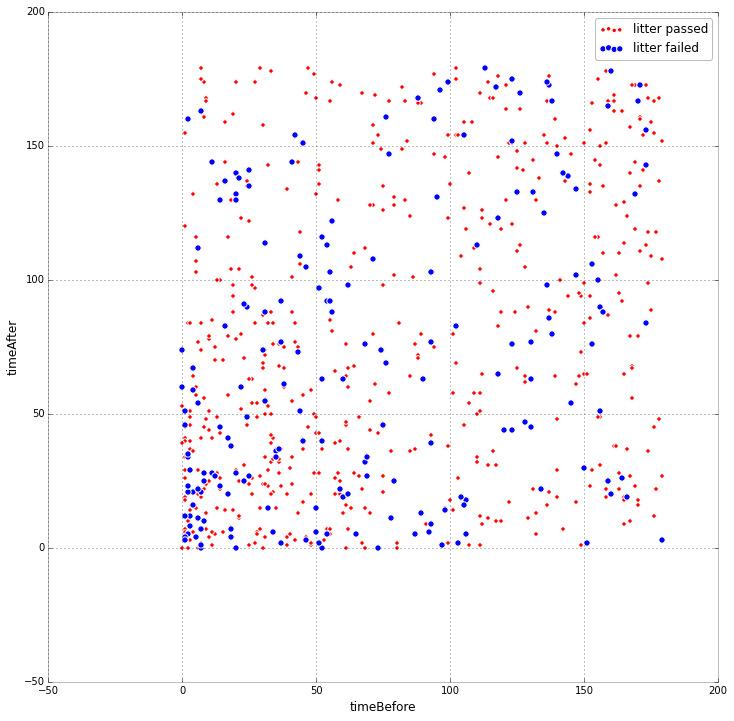

In [16]:
fig, ax = plt.subplots(figsize=(12,12))

nolitter[(nolitter.timeBefore<180) & (nolitter.timeAfter<180)].plot(kind='scatter',x='timeBefore',y='timeAfter',c='r', s=20, ax=ax, label='litter passed')
litter[(litter.timeBefore<180) & (litter.timeAfter<180)].plot(kind='scatter',x='timeBefore',y='timeAfter',c='blue', s=40,ax=ax, label='litter failed')
plt.legend(scatterpoints=4)
plt.savefig(PARQA + "parqa/Inspections/img/days_before_after_scatter2.png")